# CÓMPUTO DE ALTO RENDIMIENTO CON LENGUAJES DE ALTO NIVEL

## MINIPROYECTO 2

## IMPLEMENTACIÓN DE LAS FUNCIONES QUE CONTIENEN LOS METODOS DE SOLUCIÓN ITERATIVOS EN PYTHON

Utilizaremos $kn = 20$ iteraciones, junto con un sistema de tamaño $ n = 20$

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

función que construye el sistema de ecuaciones de prueba  𝐴𝑥=𝑏 

In [27]:
def matriz_dispersa(n):
    e = np.ones(n)
    
    n2 = int(n/2)
    diags = [-1,0,1]
    A = scipy.sparse.spdiags([-1*e, 3*e ,-1*e], diags ,n,n).toarray()
    c = scipy.sparse.spdiags([e/2],0,n,n).toarray()
    c = np.fliplr(c)
    
    A = A + c
    A[n2-1][n2] = -1
    A[n2,n2-1]=-1
    b = np.zeros((n,1))
    b[0] = 2.5
    b[n-1] = 2.5
    b[1:n-1] = 1.5
    b[n2-1:n2+1] = 1
    
    x0 = np.zeros((n,1)) 
    return A,b,x0
    
A,b,x0 = matriz_dispersa(6)
    

Definimos función para metodo de solución iterativo Jacobi

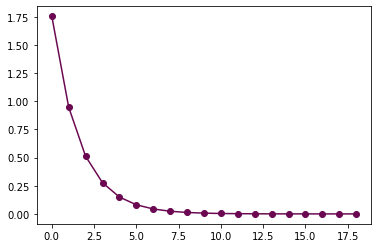

In [28]:
def jacobi_py(A,b,x0,kn):
    normres_jacobi = []
    D = np.diag(np.diag(A))
    U = np.triu(A, k=1)
    L = np.tril(A, k=-1)
    x = x0
    m = 0
    for k in range(1,kn):
        x = np.dot(  np.linalg.inv(D) , b-( np.dot(L + U,x) ) ) 
        normres_jacobi.append(np.linalg.norm(b-np.dot(A,x)))

    return normres_jacobi

k = 20
A,b,x0 = matriz_dispersa(6)
jj=jacobi_py(A,b,x0,k)

plt.plot(jj, color="#6b0851", marker='o')
plt.show()

Definimos función para método de solución iterativo Gass-Seidel

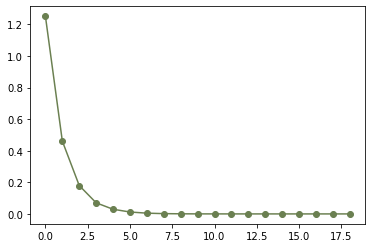

In [151]:
def gauss_seidel_py(A,b,x0,k):
    normres_gauss_seidel = []
    L = np.tril(A)
    U = np.triu(A, k=1)
    x = x0
    for k in range(1,k):
        x = np.dot(np.linalg.inv(L) , b - (np.dot( U , x))) 
        normres_gauss_seidel.append(np.linalg.norm(b - np.dot(A,x)))

    return normres_gauss_seidel
k = 20
A,b,x0 = matriz_dispersa(6)
gg=gauss_seidel_py(A,b,x0,k)

plt.plot(gg, color="#6b8051", marker='o')
plt.show()

Definimos función para método de solución iterativo Sobre-relajación sucesiva

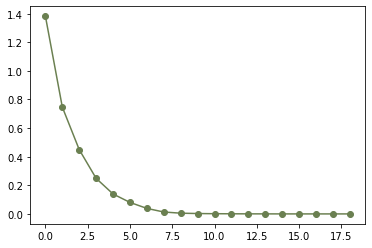

In [139]:
def srs_py(A,b,x0,k,w):    
    normres_srs = []
    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)
    D = np.diag(np.diag(A))
    x = x0
    for k in range(1,k):
        x = np.dot(np.linalg.inv(np.dot(w , L) + D) , (np.dot((1 - w) , np.dot(D , x)) - np.dot(np.dot(w , U) , x))) +  np.dot(np.dot(w , np.linalg.inv(D + np.dot(L , w))) , b)
        normres_srs.append(np.linalg.norm(b - np.dot(A,x)))

    return normres_srs
w = 1.4
k = 20
A,b,x0 = matriz_dispersa(6)
ss=srs_py(A,b,x0,k,w)

plt.plot(ss, color="#6b8051", marker='o')
plt.show()

Definimos función para método de solución iterativo Gradiente Conjugado

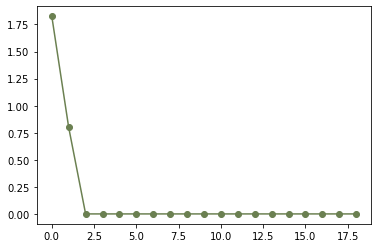

In [25]:
def gradiente_conjugado(A,b,x0,k):
    normres_grc = []
    x = x0
    d = r = b - np.dot(A,x)
    for k in range(1,k):
        alfa = np.dot(r.transpose(),r) / np.dot(d.transpose(),np.dot(A,d))
        x = x + alfa*d
        rk = r - alfa*np.dot(A,d)
        beta = np.dot(rk.transpose(),rk) / np.dot(r.transpose(),r)
        dk = rk + beta*d
        r = rk
        d = dk
        normres_grc.append(np.linalg.norm(b - np.dot(A,x)))
    return normres_grc
    
A,b,x0 = matriz_dispersa(6)

grc = gradiente_conjugado(A,b,x0,20)
plt.plot(grc, color="#6b8051", marker='o')
plt.show()